In [171]:
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [172]:
!pip install phik
import phik

In [173]:
pd.options.display.max_columns = None
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

In [174]:
df = pd.read_csv('ds_salaries.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [175]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [176]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,3755.0,2022.373635,0.691448,2020.0,2022.0,2022.0,2023.0,2023.0
salary,3755.0,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
salary_in_usd,3755.0,137570.389880,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0
remote_ratio,3755.0,46.271638,48.589050,0.0,0.0,0.0,100.0,100.0


In [177]:
df.describe(include='object').T

,count,unique,top,freq
experience_level,3755,4,SE,2516
employment_type,3755,4,FT,3718
job_title,3755,93,Data Engineer,1040
salary_currency,3755,20,USD,3224
employee_residence,3755,78,US,3004
company_location,3755,72,US,3040
company_size,3755,3,M,3153


In [178]:
df['experience_level'].value_counts()

experience_level
SE    2516
MI     805
EN     320
EX     114
Name: count, dtype: int64

In [179]:
df['job_title'].value_counts().head(10)

job_title
Data Engineer                1040
Data Scientist                840
Data Analyst                  612
Machine Learning Engineer     289
Analytics Engineer            103
Data Architect                101
Research Scientist             82
Data Science Manager           58
Applied Scientist              58
Research Engineer              37
Name: count, dtype: int64

In [180]:
df['employee_residence'].value_counts().head(10)

employee_residence
US    3004
GB     167
CA      85
ES      80
IN      71
DE      48
FR      38
PT      18
BR      18
GR      16
Name: count, dtype: int64

In [181]:
df['company_location'].value_counts().head(10)

company_location
US    3040
GB     172
CA      87
ES      77
IN      58
DE      56
FR      34
BR      15
AU      14
GR      14
Name: count, dtype: int64

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [183]:
df[df.duplicated()]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
115,2023,SE,FT,Data Scientist,150000,USD,150000,US,0,US,M
123,2023,SE,FT,Analytics Engineer,289800,USD,289800,US,0,US,M
153,2023,MI,FT,Data Engineer,100000,USD,100000,US,100,US,M
154,2023,MI,FT,Data Engineer,70000,USD,70000,US,100,US,M
160,2023,SE,FT,Data Engineer,115000,USD,115000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
3439,2022,MI,FT,Data Scientist,78000,USD,78000,US,100,US,M
3440,2022,SE,FT,Data Engineer,135000,USD,135000,US,100,US,M
3441,2022,SE,FT,Data Engineer,115000,USD,115000,US,100,US,M
3586,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L


In [184]:
dfn = df.drop_duplicates()
dfn.head(15)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [185]:
dfn.info()

# удаление 1171 дубликатов строк.

<class 'pandas.core.frame.DataFrame'>
Index: 2584 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2584 non-null   int64 
 1   experience_level    2584 non-null   object
 2   employment_type     2584 non-null   object
 3   job_title           2584 non-null   object
 4   salary              2584 non-null   int64 
 5   salary_currency     2584 non-null   object
 6   salary_in_usd       2584 non-null   int64 
 7   employee_residence  2584 non-null   object
 8   remote_ratio        2584 non-null   int64 
 9   company_location    2584 non-null   object
 10  company_size        2584 non-null   object
dtypes: int64(4), object(7)
memory usage: 242.2+ KB


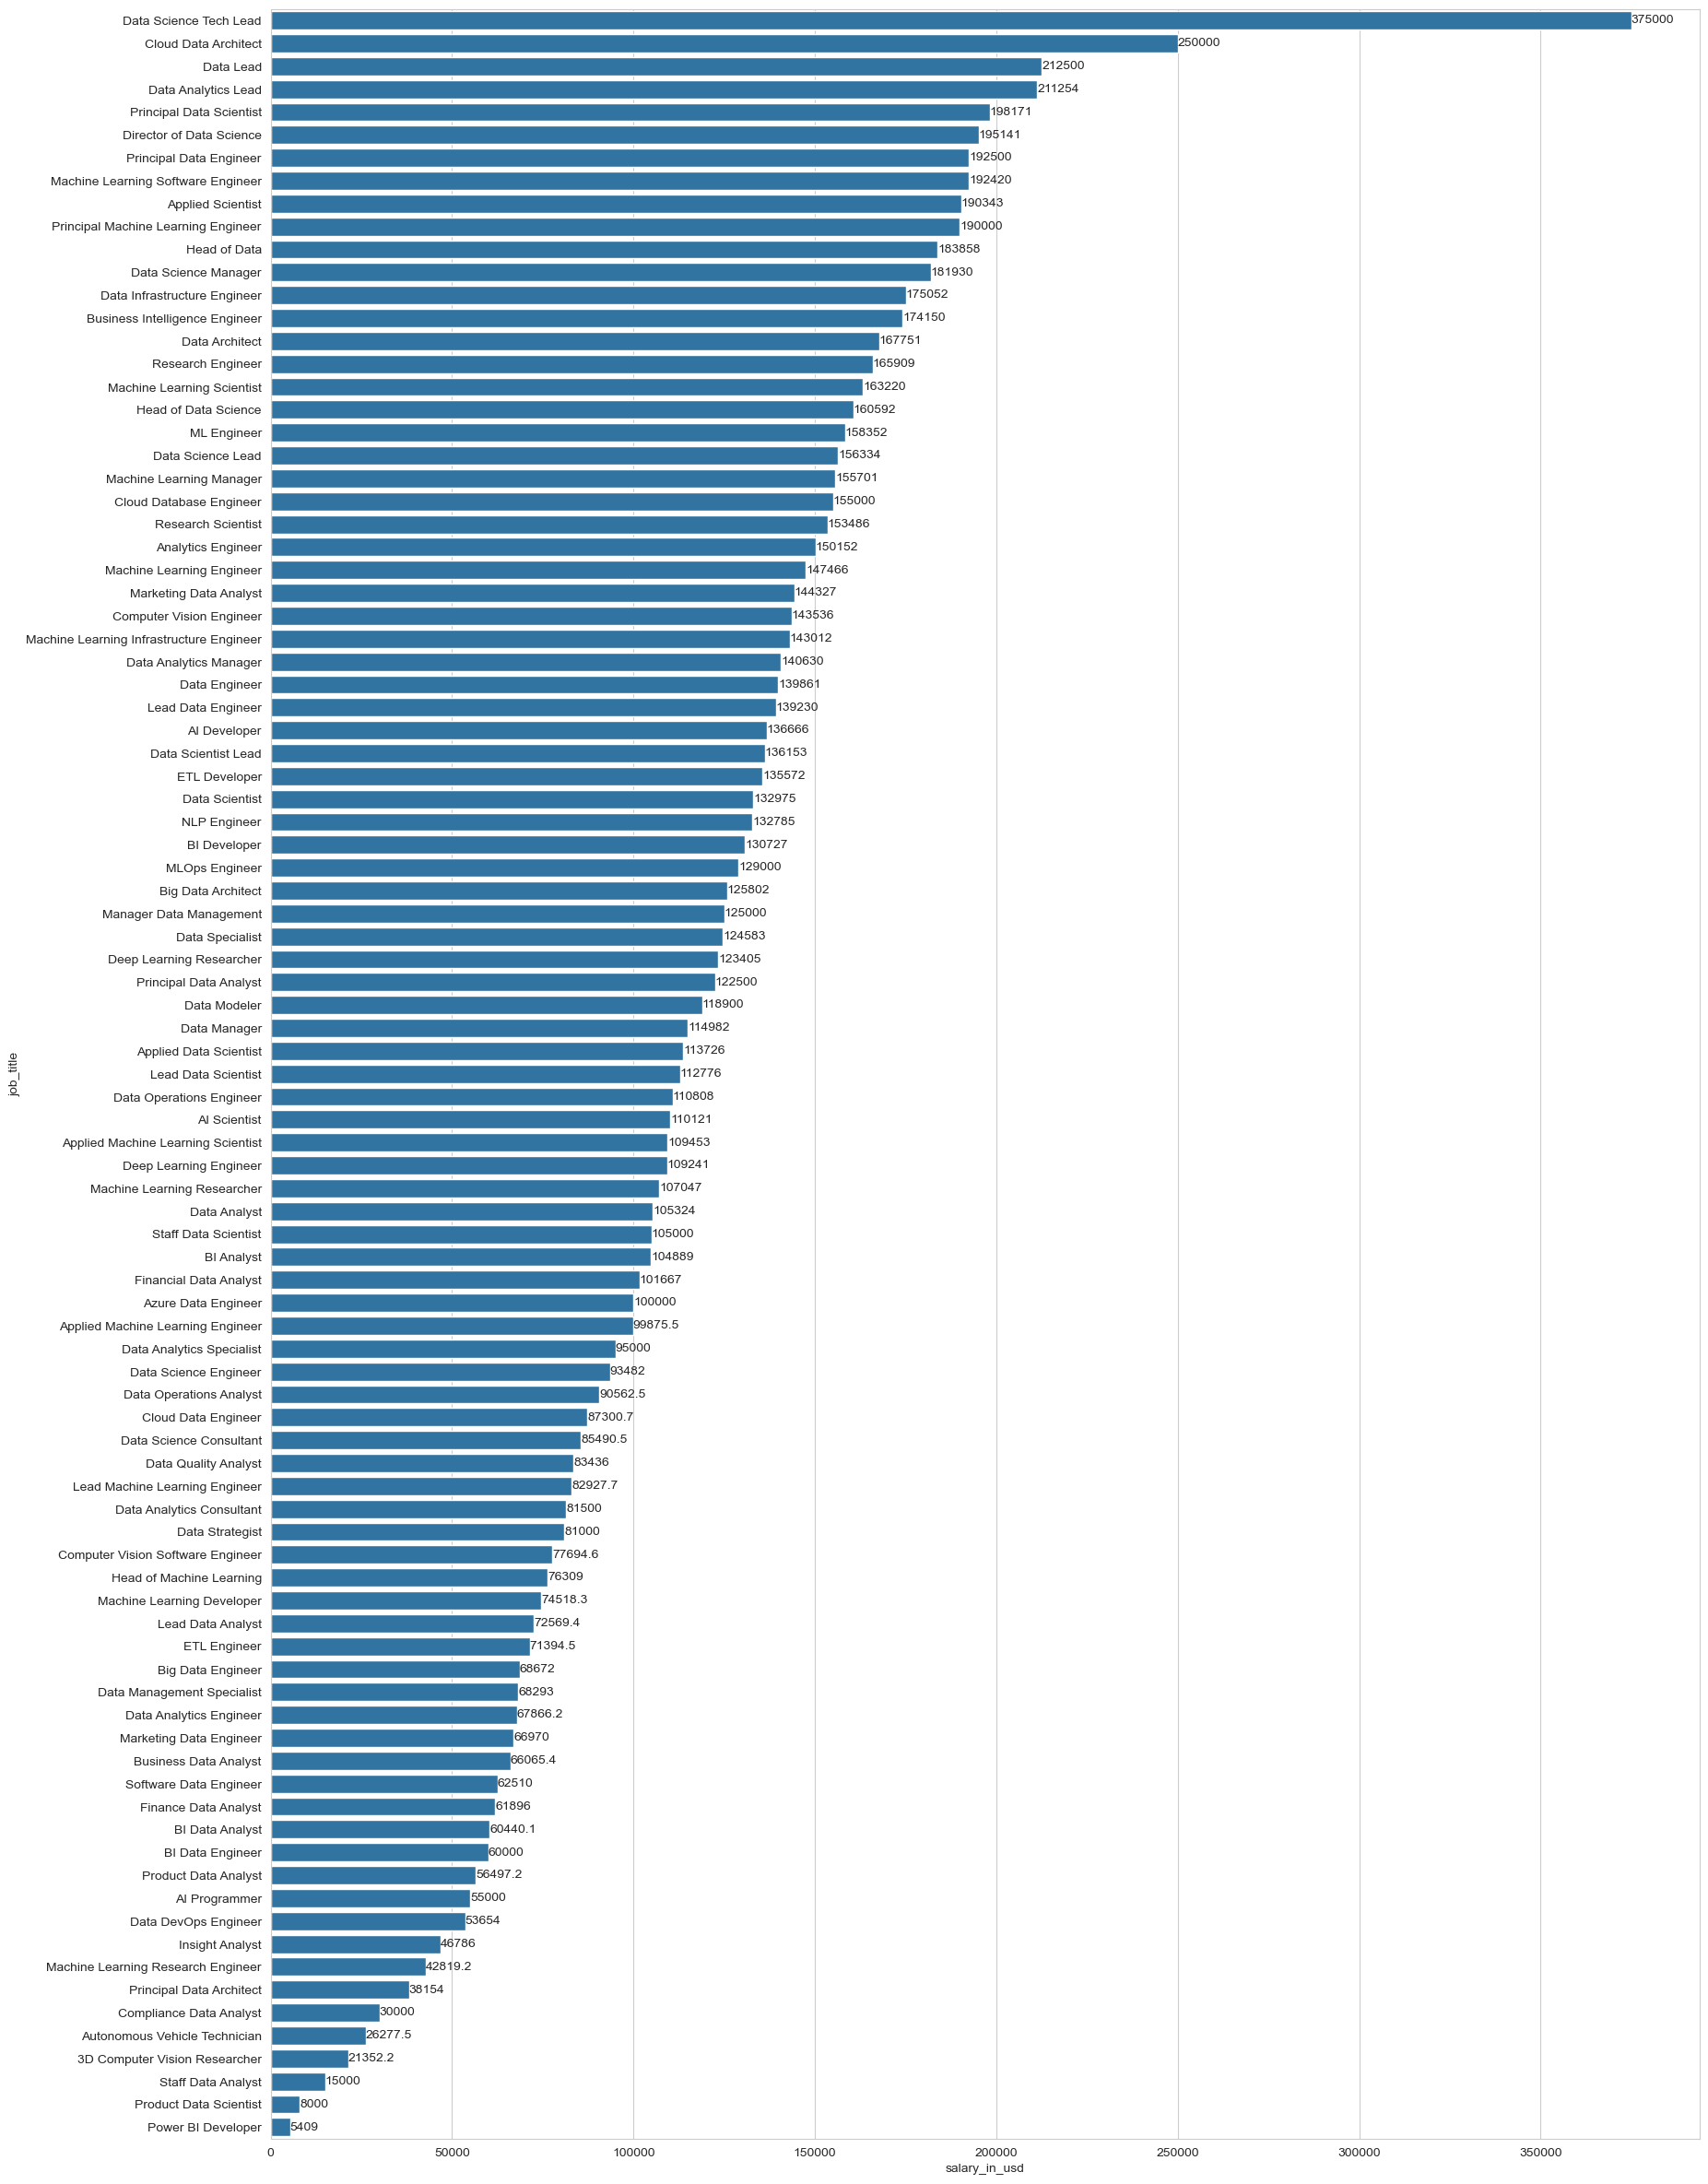

In [186]:
mean_salary = dfn.groupby(['job_title'])['salary_in_usd'].agg('mean').sort_values(ascending=False)
plt.figure(figsize=(20,30))
ax = sns.barplot(x=tmp, y=tmp.index, orient='h', order=tmp.index)
ax.bar_label(ax.containers[0])
plt.show()

#  средние зп

In [187]:
mean_salary.head(15)  

# самые высокооплачиваемые

job_title
Data Science Tech Lead                 375000.000000
Cloud Data Architect                   250000.000000
Data Lead                              212500.000000
Data Analytics Lead                    211254.500000
Principal Data Scientist               198171.125000
Director of Data Science               195140.727273
Principal Data Engineer                192500.000000
Machine Learning Software Engineer     192420.000000
Applied Scientist                      190342.580645
Principal Machine Learning Engineer    190000.000000
Head of Data                           183857.500000
Data Science Manager                   181930.173077
Data Infrastructure Engineer           175051.666667
Business Intelligence Engineer         174150.000000
Data Architect                         167751.453125
Name: salary_in_usd, dtype: float64

Самые высооплачиваемые должности по показателю средней зарплаты: Data Science Tech Lead, Cloud Data Architect, Data Lead, Data Analytics Lead, Principal Data Scientist.

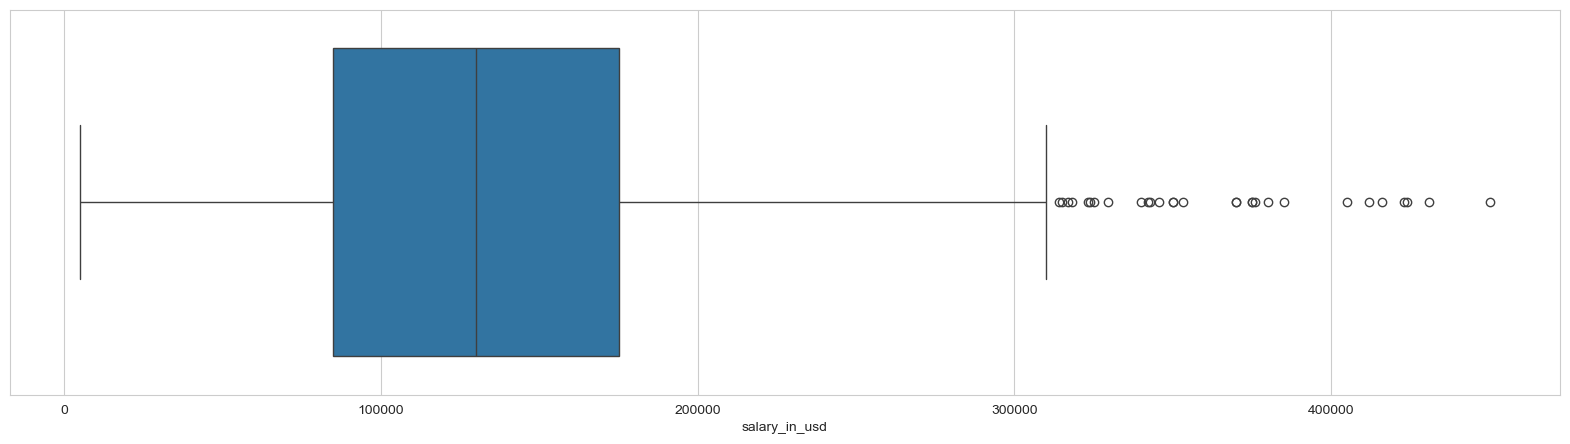

In [189]:
plt.figure(figsize=(20,5))
sns.boxplot(dfn.salary_in_usd, orient='h')
plt.show()

# выбросы по ЗП

In [190]:
dfn[dfn.salary_in_usd >= 300000].sort_values('salary_in_usd', ascending=False)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3522,2020,MI,FT,Research Scientist,450000,USD,450000,US,0,US,M
2011,2022,MI,FT,Data Analyst,350000,GBP,430967,GB,0,GB,M
528,2023,SE,FT,AI Scientist,1500000,ILS,423834,IL,0,IL,L
3747,2021,MI,FT,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,L
3675,2021,EX,CT,Principal Data Scientist,416000,USD,416000,US,100,US,S
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3463,2022,SE,FT,Data Analytics Lead,405000,USD,405000,US,100,US,L
1288,2023,SE,FT,Data Analyst,385000,USD,385000,US,0,US,M
3468,2022,SE,FT,Applied Data Scientist,380000,USD,380000,US,100,US,L
649,2023,SE,FT,Data Architect,376080,USD,376080,US,100,US,M


Выбросы по ЗП. 

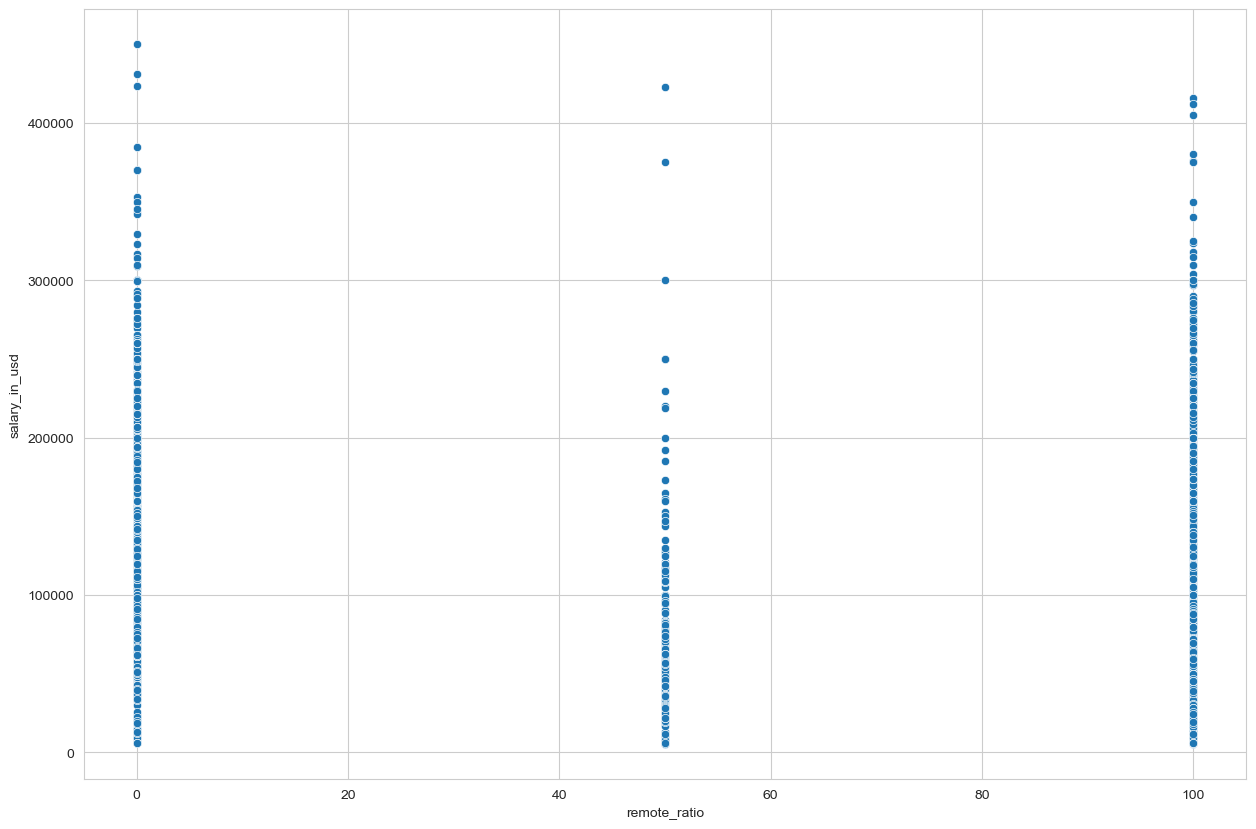

In [191]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=dfn.remote_ratio, y=dfn.salary_in_usd);

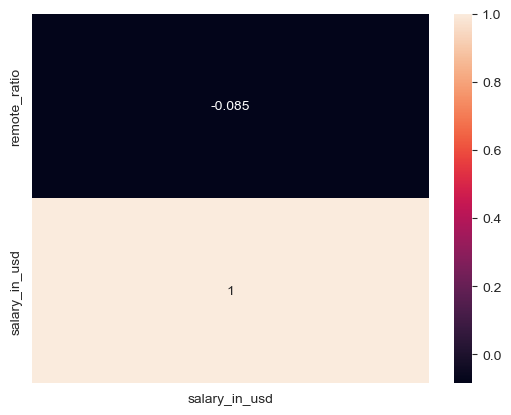

In [194]:
sns.heatmap(dfn[['remote_ratio', 'salary_in_usd']].corr()[['salary_in_usd']], annot=True);

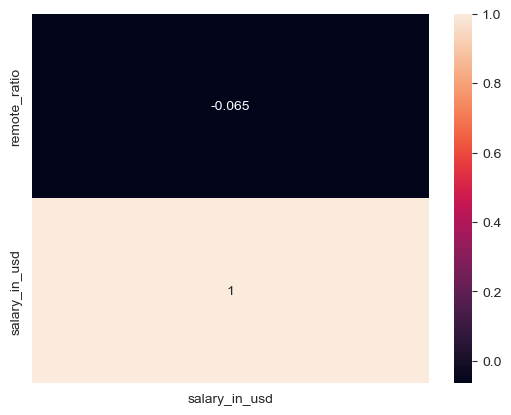

In [195]:
sns.heatmap(dfn[['remote_ratio', 'salary_in_usd']].corr('kendall')[['salary_in_usd']], annot=True);

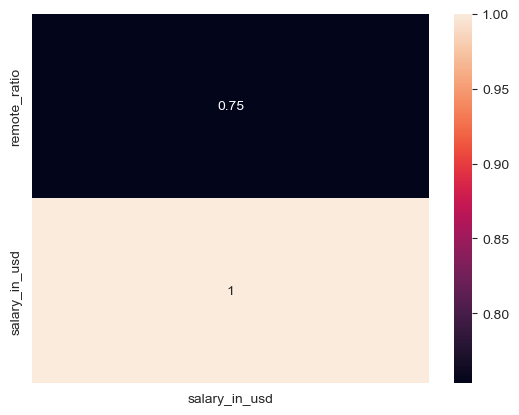

In [196]:
sns.heatmap(dfn[['remote_ratio', 'salary_in_usd']].phik_matrix(interval_cols=['remote_ratio'])[['salary_in_usd']], annot=True);

Есть корреляция удаленной работы и зарплаты. 

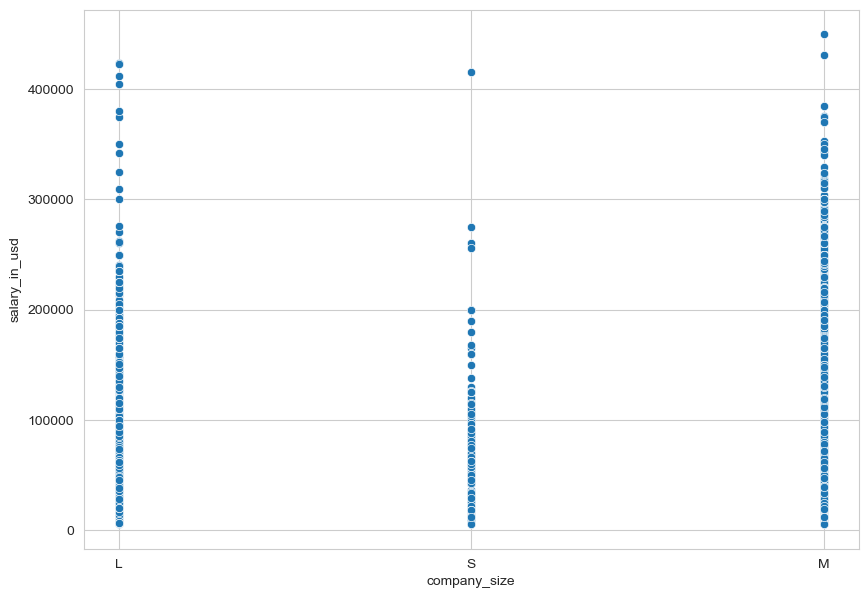

In [197]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=dfn.company_size, y=dfn.salary_in_usd);

В компании размера S - ЗП ниже, однако в компаниях размера М и L - размер ЗП не сильно отличается. 

In [198]:
size = dfn.groupby("company_size")["salary_in_usd"].mean().sort_values(ascending=False)
size.head()

company_size
M    141474.514300
L    113202.239609
S     78364.278912
Name: salary_in_usd, dtype: float64

In [ ]:
Средняя ЗП в компании размера M, выше средней ЗП в компании L, в компании S, ниже всего.

In [204]:
df['company_location'].value_counts().head(10)

company_location
US    3040
GB     172
CA      87
ES      77
IN      58
DE      56
FR      34
BR      15
AU      14
GR      14
Name: count, dtype: int64

In [ ]:
Cтраны наиболее популярны среди вакансий

In [205]:
location = dfn.groupby("company_location")["salary_in_usd"].mean().sort_values(ascending=False)
location.head(10)

company_location
IL    271446.500000
PR    167500.000000
US    152374.791602
RU    140333.333333
CA    130572.759036
NZ    125000.000000
BA    120000.000000
IE    114943.428571
JP    114127.333333
SE    105000.000000
Name: salary_in_usd, dtype: float64

In [ ]:
ЗП выше в следующих странах

In [206]:
location = dfn.groupby("company_location")["salary_in_usd"].mean().sort_values()
location.head(10)

company_location
MK     6304.0
BO     7500.0
AL    10000.0
MA    10000.0
VN    12000.0
SK    12608.0
MD    18000.0
GH    18500.0
TR    19058.0
HN    20000.0
Name: salary_in_usd, dtype: float64

ЗП ниже в следующих странах

In [207]:
median_salary = dfn.groupby(['job_title'])['salary_in_usd'].agg('median').sort_values(ascending=False)
median_salary.head(10)

job_title
Data Science Tech Lead                 375000.0
Cloud Data Architect                   250000.0
Data Lead                              212500.0
Data Analytics Lead                    211254.5
Head of Data                           202500.0
Principal Data Engineer                192500.0
Applied Scientist                      192000.0
Principal Machine Learning Engineer    190000.0
Data Infrastructure Engineer           183655.0
Machine Learning Software Engineer     181800.0
Name: salary_in_usd, dtype: float64

In [ ]:
Медианная зарплата

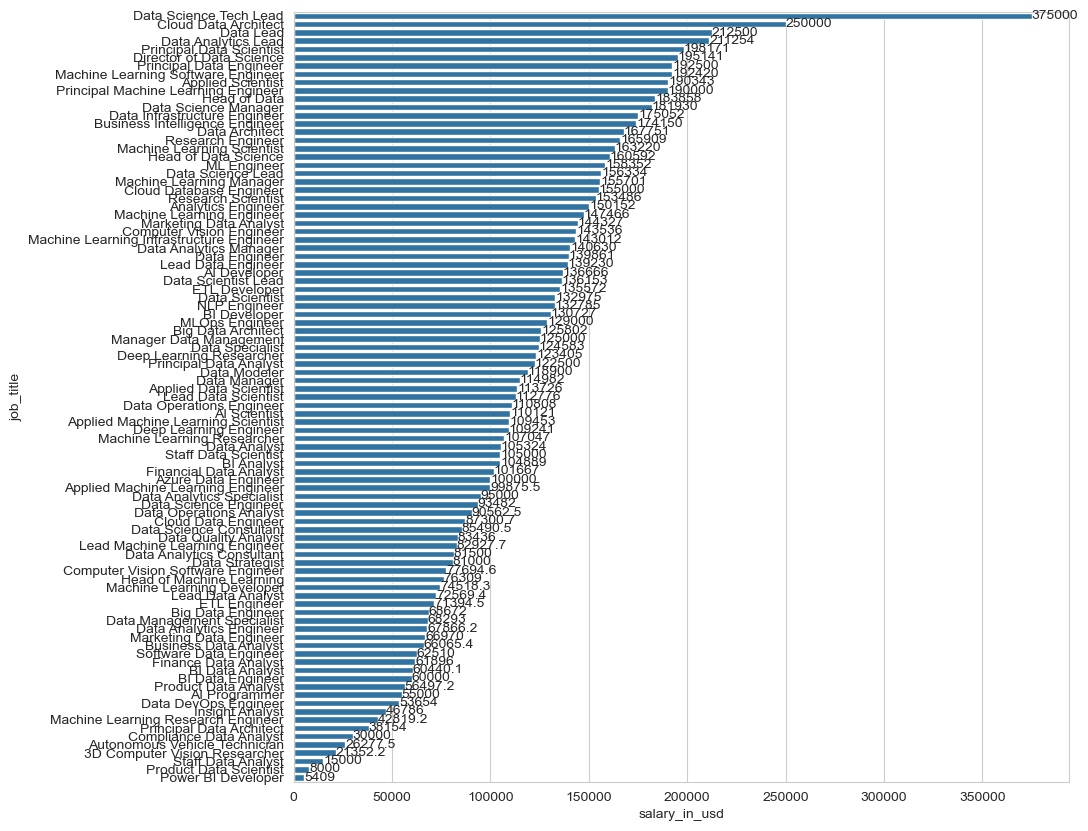

In [208]:
tmp = dfn.groupby(['job_title'])['salary_in_usd'].agg('mean').sort_values(ascending=False)

plt.figure(figsize=(10,10))
ax = sns.barplot(x=tmp, y=tmp.index, orient='h', order=tmp.index)
ax.bar_label(ax.containers[0])
plt.show()

In [227]:
title = tmp[:15].index
title

Index(['Data Science Tech Lead', 'Cloud Data Architect', 'Data Lead',
       'Data Analytics Lead', 'Principal Data Scientist',
       'Director of Data Science', 'Principal Data Engineer',
       'Machine Learning Software Engineer', 'Applied Scientist',
       'Principal Machine Learning Engineer', 'Head of Data',
       'Data Science Manager', 'Data Infrastructure Engineer',
       'Business Intelligence Engineer', 'Data Architect'],
      dtype='object', name='job_title')

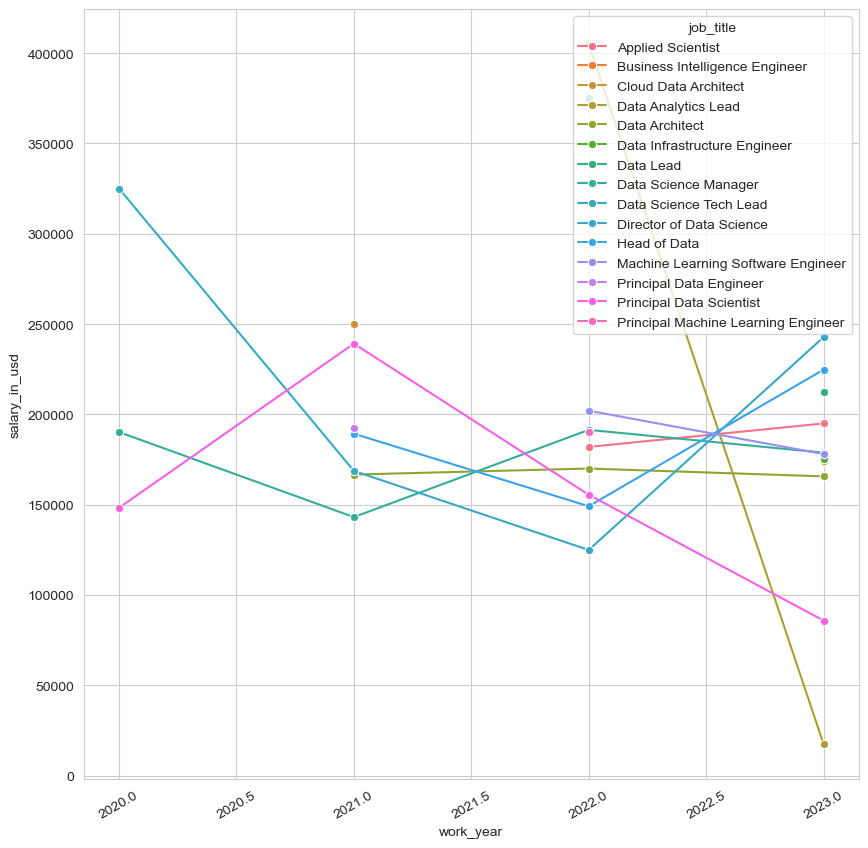

In [228]:
temp = dfn[dfn.job_title.isin(title)].groupby(['job_title', 'work_year'])['salary_in_usd'].agg('mean').reset_index()

plt.figure(figsize=(10,10))
sns.lineplot(x=temp.work_year, y=temp.salary_in_usd, hue=temp.job_title, marker='o')
ax.set_xticks(temp.work_year.unique())
plt.xticks(rotation=30)
plt.show()

Изменения ЗП с 2020г. до 2023г. на примере топ-15 высооплачиваемых должностей. Такие как - Data Analytics Lead, Principal Data Scientist, резко упали, а например - Head of Data, вырос. Многие професии появились в 2022г. и поэтому сильно не изменились относительно 2023г.

In [165]:
dfn.sort_values (by='salary_in_usd', ascending=False)[dfn.work_year == 2023].head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
528,2023,SE,FT,AI Scientist,1500000,ILS,423834,IL,0,IL,L
1288,2023,SE,FT,Data Analyst,385000,USD,385000,US,0,US,M
649,2023,SE,FT,Data Architect,376080,USD,376080,US,100,US,M
1311,2023,SE,FT,Research Scientist,370000,USD,370000,US,0,US,M
1105,2023,SE,FT,Data Scientist,370000,USD,370000,US,0,US,M


In [ ]:
топ-5 самых выскооплачиваемых специалиста в 2023г.,
4 из 5 из US, 1 из IL
Профессии : AI Scientist, Data Analyst, Data Architect, Research Scientist, Data Scientist,
удаленно работает только 1 из 5

In [232]:
location = dfn[dfn.duplicated(['employee_residence', 'company_location'])]
location

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [ ]:
2440 из 2584, находятся в той же стране, что и компания, в которой работают

In [233]:
dfn['employee_residence'].value_counts().head(15)

employee_residence
US    1893
GB     150
CA      81
IN      70
ES      47
DE      47
FR      37
PT      18
BR      18
NL      15
GR      13
AU      11
MX      10
IT       8
PK       8
Name: count, dtype: int64

Больше всего проживают в US

In [247]:
us = dfn[dfn.employee_residence == 'US']
us.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [249]:
us['remote_ratio'].value_counts()

remote_ratio
0      971
100    888
50      34
Name: count, dtype: int64

In [251]:
us.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1893 entries, 1 to 3753
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           1893 non-null   int64 
 1   experience_level    1893 non-null   object
 2   employment_type     1893 non-null   object
 3   job_title           1893 non-null   object
 4   salary              1893 non-null   int64 
 5   salary_currency     1893 non-null   object
 6   salary_in_usd       1893 non-null   int64 
 7   employee_residence  1893 non-null   object
 8   remote_ratio        1893 non-null   int64 
 9   company_location    1893 non-null   object
 10  company_size        1893 non-null   object
dtypes: int64(4), object(7)
memory usage: 177.5+ KB


In [252]:
us[us.duplicated(['employee_residence', 'company_location'])]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M
10,2023,SE,FT,Data Scientist,90700,USD,90700,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
3749,2021,SE,FT,Data Specialist,165000,USD,165000,US,100,US,L
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S


In [259]:
us_dubl = us.drop_duplicates(['employee_residence', 'company_location'])
us_dubl[us_dubl.remote_ratio == 100]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2120,2022,SE,FT,Data Analyst,171000,USD,171000,US,100,AU,L
2206,2022,EN,FT,3D Computer Vision Researcher,50000,USD,50000,US,100,CR,S
3676,2021,SE,FT,Machine Learning Scientist,225000,USD,225000,US,100,CA,L
3719,2021,SE,FT,Data Science Manager,152000,USD,152000,US,100,FR,L


In [ ]:
В US из 1893, 4 работают полностью удаленно в компании другой страны.